# 1. Neural Networks and Iris Flowers

Many machine learning prediction problems are rooted in complex data and its non-linear relationships between features. Neural networks are a class of models that can learn these non-linear interactions between variables.

We will introduce neural networks by predicting the species of iris flowers from data with the following features:

- sepal_length - Continuous variable measured in centimeters.
- sepal_width - Continuous variable measured in centimeters.
- petal_length - Continuous variable measured in centimeters.
- petal_width - Continuous variable measured in centimeters.
- species - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.

The DataFrame class includes a hist() method which creates a histogram for every numeric column in that DataFrame. The histograms are generated using Matplotlib and displayed using plt.show().

    sepal_length  sepal_width  petal_length  petal_width          species
85           7.7          3.0           6.1          2.3   Iris-virginica
17           5.8          2.7           4.1          1.0  Iris-versicolor
52           7.1          3.0           5.9          2.1   Iris-virginica
77           6.1          3.0           4.9          1.8   Iris-virginica
74           6.7          3.3           5.7          2.1   Iris-virginica
['Iris-virginica' 'Iris-versicolor']


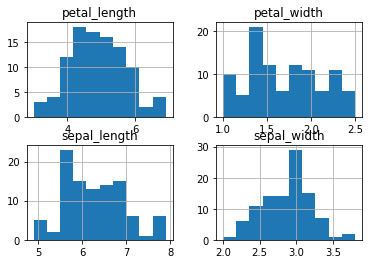

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())
iris.hist()
plt.show()

# 2. Neurons

So far we have talked about methods which do not allow for a large amount of non-linearity. For example, in the two dimensional case shown below, we want to find a function that can cleanly seperate the X's from the O's.

![](l92oKZd.png)

Neither a linear model nor logistic model is capable of building such a function, so we must explore other options like neural networks. Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output. Below we see a representation of a neuron.

![](RdPPxre.png)

This neuron is taking in 5 units represented as x, a bias unit, and 4 features. This bias unit (1) is similar in concept to the intercept in linear regression and it will shift the activity of the neuron to one direction or the other. These units are then fed into an activation function h. We will use the popular sigmoid (logistic) activation function because it returns values between 0 and 1 and can be treated as probabilities.

$\text{Sigmoid Function: }g(z) = \dfrac{1}{1 + e^{-z}}$


This sigmoid function then leads to the corresponding activation function:

$\text{Sigmoid Activation Function: }h_{\Theta}(x) = \dfrac{1}{1+e^{-\Theta^T x}} = \dfrac{1}{1+e^{-(\theta_01 + \theta_1x_1 + \theta_2 x_2)}}$

If you look closely, you might notice that the logistic regression function we learned in previous lessons can be represented here as a neuron.

**MC Sidenote: This video is very helpful... essentailly it breaks the activation function (which can change) into a pre activation (which is essentially a linear equation and an activation (which in this example is the sigmoid funciton). So if your activation is 0, then your neuron output will just be a linear model. **
https://www.youtube.com/watch?v=SGZ6BttHMPw

pre-activation = a(x)
activation (output) = h(x) = g(a(x))

![](Picture1.png)



<font color=red size=8> Below we are trying to predict whether or not a flower is a 'Iris-veriscolor' or not. This is a binary classifier.</font>

In [2]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1 (columns must match rows for matrix multiplicaiton to work!)
print(np.dot(z,y.T))

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values #turn X into a matrix
y = (iris.species == 'Iris-versicolor').values.astype(int) 

# The first observation
x0 = X[0]

# Initialize thetas randomly (mean=0, std = 0.01, rows=5, cols=1)
# MC EDIT; theta values are essentially the coefficients... I think
theta_init = np.random.normal(0,0.01,size=(5,1)) # set random weights to start
def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta) #create vector of random weights
    return 1 / (1 + np.exp(-np.dot(theta.T, x))) # note that np.dot(theta.T,x0) is equal to np.dot(x0,theta)
                
a1 = sigmoid_activation(x0, theta_init)
print('Prediction/final output node: ',a1)

# this is essentiall taking the the multiplication of the input nodes and the weights, and then applying a activation function
# in this case, the activation function is the sigmoid function
# because we are only use one row of data in this first calc, we only get ONE number, 0.4730833.... This is out ouput node

[[17]]
Prediction/final output node:  [ 0.55740271]


In [3]:
# Note that these are the same!

theta = np.array([[-0.0209818 ],
                       [ 0.00366465],
                       [-0.00123329],
                       [-0.00730515],
                       [ 0.01762441]])

print('theta shape: ',theta.shape)
print('x0 shape: ',x0.shape)
print(np.dot(theta.T,x0))
print(np.dot(x0,theta))
print(np.dot(x0.T,theta))

theta shape:  (5, 1)
x0 shape:  (5,)
[-0.00048914]
[-0.00048914]
[-0.00048914]


In [4]:
# So, we can now do the activation function with THE ENTIRE DATA set, and get a prediction value (h0(x)) for each row:
print(theta_init.T.shape)
print(X.shape)

print('We need to transpose the X matrix so it can me mutiplied in the sigmoid function')

sigmoid_activation(X.T,theta_init)

(1, 5)
(100, 5)
We need to transpose the X matrix so it can me mutiplied in the sigmoid function


array([[ 0.55740271,  0.54388022,  0.55407451,  0.5469637 ,  0.55178596,
         0.53739573,  0.5492237 ,  0.55198488,  0.55513417,  0.54194608,
         0.53769949,  0.55175755,  0.54712715,  0.54981058,  0.54643092,
         0.54687526,  0.54647577,  0.54785269,  0.54856388,  0.55923935,
         0.54988707,  0.53815012,  0.54331673,  0.54148917,  0.54584216,
         0.54953956,  0.55030976,  0.54022803,  0.54226941,  0.54484682,
         0.54572855,  0.54623624,  0.54628055,  0.54564577,  0.55601848,
         0.54504013,  0.55081912,  0.54665484,  0.55258887,  0.54669923,
         0.54849869,  0.55022421,  0.54585225,  0.5429631 ,  0.54328137,
         0.54947011,  0.543496  ,  0.54857446,  0.5494121 ,  0.54895881,
         0.54975973,  0.54904662,  0.55903303,  0.54130922,  0.54778779,
         0.55130072,  0.55127736,  0.55815667,  0.5419006 ,  0.54787957,
         0.54271306,  0.54846778,  0.55119305,  0.54168089,  0.54438668,
         0.54572855,  0.54727434,  0.54780292,  0.5

# 3. Cost Function

We can train a single neuron as a two layer network using gradient descent. As we learned in the previous mission, we need to minimize a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output, defined as:

$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^{m} (y_i * log(h_{\Theta}(x_i)) + (1-y_i) log(1-h_{\Theta}(x_i)))$

Since our targets, yi, are binary, either $y_i$ or $(1-y_i)$ will equal zero. One of the terms in the summation will disappear because of this result and. the activation function is then used to compute the error. For example, if we observe a true target, $y_i=1$, then we want $h_{\Theta}(x_i)$ to also be close to 1. So as $h_{\Theta}(x_i)$ approaches 1, the $log(h_{\Theta}(x_i))$ becomes very close to 0. Since the log of a value between 0 and 1 is negative, we must take the negative of the entire summation to compute the cost. The parameters are randomly initialized using a normal random variable with a small variance, less than 0.1.

<font color=red> **Ok, so in plain english: This is a cost function above, essentially a mean squared error function (or whatever the equivalent is for logistic classifiers) that we are trying to minimize. We are trying to optimize the model be finding the group of model weights (coefficients in the linear regression sense) that produce the lowest possible value for the cost function. This would look like the bottom of the parabala in a three input equation... Anyway, we take a bunch of deriviatives out fo this equation for each weight, find the slope of each, and adjust the weights each time (using backward propogation) by subtracting the slope*learning rate from the current weight. This is gradient decsent, which we have covered multiple times now! You are a pro!**

In [5]:
# First observation's features and target
x0 = X[0] # this is the features (select first row)
y0 = y[0] # this is the single column of 1s and 0s (the thing we are trying to predict)(select first row)

# Initialize parameters, we have 5 units (features) and just 1 layer (dependent variable)
theta_init = np.random.normal(0,0.01,size=(5,1))

def singlecost(X, y, theta):
    # Compute activation
    h = sigmoid_activation(X.T, theta)
    # Take the negative average of target*log(activation) + (1-target) * log(1-activation)
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)
first_cost

0.67873018492738701

**So above we have produced the cost for ONE SINGLE row of data (because we initialized x0 = X[0] and y0 = y[0]) and one single outcome, using the carzy cost function we have seen above... not totally sure whats going on there, but you get the concept, and you can reverse engineer the math at a later date if need be. Anyway, now lets see what the costs are for EVERY row. The cost function essentially just takes the mean of all the costs from every indvidual data point. So...**

In [6]:
print('theta_init: ',theta_init,'\n')

print('Actual vals: ',y,'\n')

print('Predictors (first 5): ',X[0:5],'\n')

theta_init:  [[  5.64927228e-03]
 [ -1.20163511e-02]
 [  3.70487384e-03]
 [ -6.84381899e-05]
 [  2.04933031e-02]] 

Actual vals:  [0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0] 

Predictors (first 5):  [[ 1.   7.7  3.   6.1  2.3]
 [ 1.   5.8  2.7  4.1  1. ]
 [ 1.   7.1  3.   5.9  2.1]
 [ 1.   6.1  3.   4.9  1.8]
 [ 1.   6.7  3.3  5.7  2.1]] 



In [7]:
# so these are all the costs
h=sigmoid_activation(X.T,theta_init)
individual_costs = (y * np.log(h)) + ((1-y) * np.log(1-h))
print(individual_costs,'\n')

print('Mean cost (cost function output) calculatated manually: ', -np.mean(individual_costs),'\n')

print('Mean cost (cost function output) calculatated with function: ', singlecost(X,y,theta_init))

[[-0.67873018 -0.71020508 -0.68027114 -0.68320547 -0.68320294 -0.70525546
  -0.68685316 -0.68165791 -0.68482454 -0.70976169 -0.70523669 -0.67869953
  -0.68224773 -0.68407419 -0.68438904 -0.70522192 -0.70732632 -0.70845607
  -0.68841319 -0.67916069 -0.68158544 -0.70662123 -0.70811624 -0.70788744
  -0.70159868 -0.68284497 -0.7119844  -0.70239398 -0.70831265 -0.68669944
  -0.68544995 -0.68380386 -0.70915375 -0.70586338 -0.67610577 -0.70872124
  -0.68485482 -0.70751766 -0.6844476  -0.71089817 -0.71037025 -0.70787873
  -0.70388974 -0.70586974 -0.70628718 -0.6888283  -0.70830773 -0.6784023
  -0.68321508 -0.71160852 -0.68509005 -0.71079301 -0.67797329 -0.70892415
  -0.70773597 -0.68588648 -0.71245027 -0.67728692 -0.70562959 -0.68211053
  -0.70203252 -0.67860982 -0.68369583 -0.70547385 -0.7123677  -0.68544995
  -0.71037519 -0.68146721 -0.70978661 -0.70630105 -0.70839641 -0.68180973
  -0.67701172 -0.68206539 -0.67929431 -0.68385899 -0.70605129 -0.68726904
  -0.70530367 -0.70649365 -0.67586457 -

**Wooohooo! We got the same number!!! This is super excellent, we are on the right track! Now its time to work through backward propogation and gradient descent!!!!**

# 4. Compute the Gradients

In the previous mission we learned that we need to compute the partial deriviatives of the cost function to get the gradients. Calculating derivatives are more complicated in neural networks than in linear regression. Here we must compute the overall error and then distribute that error to each parameter. Compute the derivative using the chain rule.

$\dfrac{\partial J}{\partial \theta_j} = \dfrac{\partial J}{\partial h(\Theta)} \dfrac{\partial h(\Theta)}{\partial \theta_j}$

This rule may look complicated, but we can break it down. The first part is computing the error between the target variable and prediction. The second part then computes the sensitivity relative to each parameter. In the end, the gradients are computed as: $\delta = (y_i - h_\Theta(x_i)) * h_\Theta(x_i) * (1-h_\Theta(x_i)) * x_i$.

Now we will step through the math. 
- A. $(y_i - h_\Theta(x_i))$ is a scalar and the error between our target and prediction. 
- B. $h_\Theta(x_i) * (1-h_\Theta(x_i))$ is also a scalar and the sensitivity of the activation function. 
- C. xi is the features for our observation i. 
- **OUTPUT: $\delta$ (delta) is then a vector of length 5, 4 features plus a bias unit, corresponding to the gradients.**

To implement this, we compute δ for each observation, then average to get the average gradient. The average gradient is then used to update the corresponding parameters.

<font color=red> **Interesting!!! These 4 peices of the equation correspond the same 4 peices we listed in the DataCamp lesson... well, kind of. We will need to work out the math at some point to figure out the main discrepencies. The 3 things we multiply to get the slope of the loss funciton w.r.t. each weight are:**
1. the slope of the loss function w.r.t. the node the weight FEEDS INTO **(Coresponds to A... maybe?)**
2. the slope of the activation function w.r.t. the node of the weight FEEDS INTO **(Coresponds to B... maybe?)**
3. the value of the node that feeds into the weight  **(Coresponds to C... maybe?)**

**Anyway, we get the point here. We are calculating the gradients (slopes) for each weight. Then we can perform gradient descent to adjust the weights until we get to slopes of 0 or as close as possible!**

In [8]:
# Initialize parameters
#theta_init = np.random.normal(0,0.01,size=(5,1))

#create one theta_init for repeating code!
theta_init = np.array([[-0.0209818 ],
                       [ 0.00366465],
                       [-0.00123329],
                       [-0.00730515],
                       [ 0.01762441]])
print('theta_init: ',theta_init,'\n')

# Store the updates into this array
grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]
for j, obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs, theta_init)
    # Get delta
    delta = (y[j]-h) * (h * (1-h)) * obs
    # accumulate
    grads += delta[:,np.newaxis]/X.shape[0]
    
grads

theta_init:  [[-0.0209818 ]
 [ 0.00366465]
 [-0.00123329]
 [-0.00730515]
 [ 0.01762441]] 



array([[ 0.00049126],
       [-0.03774042],
       [-0.01138082],
       [-0.0784368 ],
       [-0.0430239 ]])

In [9]:
# Cool. Lets try this manually to make sure we understand it. 
# First, lets calculate the gradients of ONE OBSERVATION
print('theta_init: ',theta_init,'\n')

h=sigmoid_activation(X[0],theta_init) #create output using just first observation
delta = (y[0]-h) * (h * (1-h)) * X[0] # create gradients of just one observation

print('delta of single observation: ',delta,'\n')

slope_wrt_weights_sum = np.array([0.0,0.0,0.0,0.0,0.0])
for j, obs in enumerate(X):
    #compute the output node value!
    output=sigmoid_activation(obs,theta_init)
    #compute the 5 slopes of weights!
    slope_wrt_weights_sum += (y[j]-output) * (output*(1-output)) * obs
    
print('Sum of all slopes w.r.t. weights for each row (observation): ','\n',slope_wrt_weights_sum,'\n')
print('Average of all slopes w.r.t. weights for each row (observation): ','\n',slope_wrt_weights_sum/100,'\n')

theta_init:  [[-0.0209818 ]
 [ 0.00366465]
 [-0.00123329]
 [-0.00730515]
 [ 0.01762441]] 

delta of single observation:  [-0.12496942 -0.96226455 -0.37490826 -0.76231347 -0.28742967] 

Sum of all slopes w.r.t. weights for each row (observation):  
 [ 0.0491257  -3.77404175 -1.13808218 -7.84368025 -4.3023902 ] 

Average of all slopes w.r.t. weights for each row (observation):  
 [ 0.00049126 -0.03774042 -0.01138082 -0.0784368  -0.0430239 ] 



**Neat!!! As we can see, the average of all slopes with w.r.t. weights for each row is equal to that of our funciton. So we are doing this right! We now have the gradients for each weight (which is basically the avearage slope for each weight using the error at each observation).**

# 5. Two Layer Network

Now that you can compute the gradients, use gradient descent to learn the parameters and predict the species of iris flower given the 4 features. Gradient descent minimizes the cost function by adjusting the parameters accordingly. Adjust the parameters by substracting the product of the gradients and the learning rate from the previous parameters. Repeat until the cost function converges or a maximum number of iterations is reached.

The high level algorithm is,

    while (number_of_iterations < max_iterations and (prev_cost - cost) > convergence_thres ) {
        update paramaters
        get new cost
        repeat
    }
We have implemented all these pieces in a single function learn() that can learn this two layer network. After setting a few initial variables, we begin to iterate until convergence. During each iteration we compute our gradients, update accordingly, and compute the new cost.

theta_init:  [[-0.0209818 ]
 [ 0.00366465]
 [-0.00123329]
 [-0.00730515]
 [ 0.01762441]] 



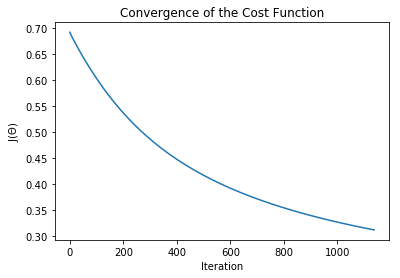

array([[ 0.62225886],
       [ 1.20995977],
       [ 0.95376563],
       [-1.71023516],
       [-1.56657761]])

In [10]:
#theta_init = np.random.normal(0,0.01,size=(5,1))
#create one theta_init for repeating code!
theta_init = np.array([[-0.0209818 ],
                       [ 0.00366465],
                       [-0.00123329],
                       [-0.00730515],
                       [ 0.01762441]])
print('theta_init: ',theta_init,'\n')

# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 20000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(inputs, actuals, weights, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(inputs, actuals, weights)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    # Loop through until convergence
    for counter in range(maxepochs):
        slopes_of_weights_avg = np.zeros(weights.shape)
        for j, row in enumerate(inputs):
            output = sigmoid_activation(row, weights)   # Compute activation
            single_row_slopes = (actuals[j]-output) * output * (1-output) * row   # Get delta
            slopes_of_weights_avg += single_row_slopes[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        weights += (slopes_of_weights_avg * learning_rate)
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = singlecost(inputs, actuals, weights) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return weights
        
updated_weights = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)
updated_weights

**Neat! That actually worked! So essentially what we are doing above is subtracting from or adding to the weights lil by lil until we get to a slope of zero, and a minimized cost function. As the slopes get closer and closer to zero, the change in weights (and therefore the change in cost) will be minimial, because you are change the weights by slope * learning rate (ie. if the slope is close to zero, then u will be chaning the weights by a veerrrryyyy tiny amount... and so the cost function will not change very much). This is why we break the function at a certain threshold (ie if the cost function is not decreasing very much any more, we can break the function as we have gotten pretty close to as low as can go!!!).**

# 6. Neural Network

Neural networks are usually built using mulitple layers of neurons. Adding more layers into the network allows you to learn more complex functions. Here's a picture representing a 3 layer neural network.

![](pictures\J1Y6YEf.png)

We have a 3 layer neural network with four input variables x1,x2,x3, and x4 and a bias unit. Each variable and bias unit is then sent to four hidden units, a1(2),a2(2),a3(2), and a4(2). The hidden units have different sets of parameters θ.

$a_1^{(2)} = g(\theta_{1,0}^{(1)} + \theta_{1,1}^{(1)} x_1 + \theta_{1,2}^{(1)} x_2 + \theta_{1,3}^{(1)} x_3 + \theta_{1,4}^{(1)} x_4)$

$a_2^{(2)} = g(\theta_{2,0}^{(1)} + \theta_{2,1}^{(1)} x_1 + \theta_{2,2}^{(1)} x_2 + \theta_{2,3}^{(1)} x_3 + \theta_{2,4}^{(1)} x_4)$

$a_3^{(2)} = g(\theta_{3,0}^{(1)} + \theta_{3,1}^{(1)} x_1 + \theta_{3,2}^{(1)} x_2 + \theta_{3,3}^{(1)} x_3 + \theta_{3,4}^{(1)} x_4)$

$a_4^{(2)} = g(\theta_{4,0}^{(1)} + \theta_{4,1}^{(1)} x_1 + \theta_{4,2}^{(1)} x_2 + \theta_{4,3}^{(1)} x_3 + \theta_{4,4}^{(1)} x_4)$


$\theta_{i,k}^{(j)}$ represents the parameter of input unit k which transform the units in layer j to activation unit $a_i^{(j+1)}$.

This layer is known as a hidden layer because the user does not directly interact with it by passing or retrieving data. The third and final layer is the 
output, or prediction, of our model. Similar to how each variable was sent to each neuron in the hidden layer, the activation units in each neuron are then sent to each neuron on the next layer. Since there is only a single layer, we can write it as:

$h_{\Theta}(X) = g(\theta_{1,0}^{(2)} + \theta_{1,1}^{(2)} a_1^{(2)} + \theta_{1,2}^{(2)} a_2^{(2)} + \theta_{1,3}^{(2)} a_3^{(2)} + \theta_{1,4}^{(2)} a_4^{(2)})$ 

While the mathematical notation may seem confusing at first, at a high level, we are organizing multiple logistic regression models to create a more complex function.

In [11]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))
def feedforward(X, theta0, theta1):
    # feedforward to the first layer
    a1 = sigmoid_activation(X.T, theta0).T
    # add a column of ones for bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

In [12]:
first_weights = np.array([[  2.86999282e-03,   2.52850202e-04,  -7.54220358e-03, 7.37058461e-03],
          [  6.92288115e-03,  -1.71379272e-02,   1.62054417e-02, -1.24161252e-02],
          [  2.61033604e-03,   4.17650574e-03,  -8.59951945e-03, -3.89896041e-03],
          [  6.04576405e-03,   6.92358290e-03,   6.43781547e-03, -6.51997646e-05],
          [ -1.08470508e-02,   7.39129180e-03,   9.83259085e-03, -7.80096354e-03]])

second_weights = np.array([[-0.0209818 ],
                       [ 0.00366465],
                       [-0.00123329],
                       [-0.00730515],
                       [ 0.01762441]])

print('first_weights.T shape: ',first_weights.T.shape,'\n')
print('X.T shape: ',X.T.shape,'\n'*2,"...This dot product should produce a 4*100 matrix",'\n')
hidden_layer_nodes = sigmoid_activation(X.T,first_weights)
print('hidden layer values shape: ',hidden_layer_nodes.shape,'\n')

print('Each row represents the 4 hidden layer output values for each row of input data (4 for each input row!!!)')

first_weights.T shape:  (4, 5) 

X.T shape:  (5, 100) 

 ...This dot product should produce a 4*100 matrix 

hidden layer values shape:  (4, 100) 

Each row represents the 4 hidden layer output values for each row of input data (4 for each input row!!!)


In [13]:
# So now we need to stack another bias layer on top, of the hidden layer nodes, and then calculate the next layer

hidden_layer_nodes = np.column_stack([np.ones(hidden_layer_nodes.T.shape[0]),hidden_layer_nodes.T])
print('Transposed hidden layer with 1s: ',hidden_layer_nodes.shape,'\n')

hidden_layer_nodes[0:10]



Transposed hidden layer with 1s:  (100, 5) 



array([[ 1.        ,  0.51897541,  0.48501802,  0.53825677,  0.47046682],
       [ 1.        ,  0.51599734,  0.4869798 ,  0.5248441 ,  0.4792024 ],
       [ 1.        ,  0.51817815,  0.4868715 ,  0.53502987,  0.47271526],
       [ 1.        ,  0.51575232,  0.48886956,  0.52865766,  0.47641106],
       [ 1.        ,  0.51738036,  0.48855134,  0.53245426,  0.47366497],
       [ 1.        ,  0.51303727,  0.48913664,  0.52056414,  0.48229689],
       [ 1.        ,  0.51565085,  0.48940906,  0.53130638,  0.47430838],
       [ 1.        ,  0.51714284,  0.4869673 ,  0.53320841,  0.47324519],
       [ 1.        ,  0.51796064,  0.48815404,  0.53544814,  0.47104197],
       [ 1.        ,  0.51485323,  0.48626581,  0.523691  ,  0.47961935]])

In [14]:
#time for the third layer - the prediction/output node!
print('second_weights transposed shape: ',second_weights.T.shape,'\n')
print('Hidden layer oupouts transpose shape: ',hidden_layer_nodes.T.shape,'\n')
output_nodes = sigmoid_activation(hidden_layer_nodes.T,second_weights)
print('Output nodes shape: ',output_nodes.shape)
output_nodes



second_weights transposed shape:  (1, 5) 

Hidden layer oupouts transpose shape:  (5, 100) 

Output nodes shape:  (1, 100)


array([[ 0.49617046,  0.49623011,  0.49618496,  0.49621004,  0.4961926 ,
         0.49624818,  0.49619568,  0.49618964,  0.49617623,  0.49623323,
         0.49624358,  0.49619729,  0.49620846,  0.49619829,  0.49621323,
         0.49621467,  0.49621713,  0.4962113 ,  0.49619907,  0.4961707 ,
         0.49620331,  0.49624598,  0.49622732,  0.49623461,  0.49621386,
         0.49619893,  0.49620404,  0.49623498,  0.49623258,  0.4962139 ,
         0.49621346,  0.49621207,  0.49621758,  0.49621755,  0.49618234,
         0.49622005,  0.49619442,  0.49621692,  0.49618715,  0.49621561,
         0.4962085 ,  0.49620057,  0.4962159 ,  0.49622869,  0.49622708,
         0.49619522,  0.49622711,  0.49621501,  0.49619913,  0.49620969,
         0.49619668,  0.49620668,  0.49616879,  0.49623644,  0.49621028,
         0.49618801,  0.49620059,  0.49617441,  0.49623095,  0.49620464,
         0.49622842,  0.49621084,  0.49618707,  0.49622996,  0.49622675,
         0.49621346,  0.49621396,  0.49620645,  0.4

# 7. Multiple Neural Network Cost Function
The cost function to multiple layer neural networks is identical to the cost function we used in the last screen, but $h_{\Theta}(x_{i})$ is more complicated.

$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^m (y_{i} * log(h_{\Theta}(x_{i}))  +  (1-y_{i}) log(1-h_{\Theta}(x_i))$

In [15]:
first_weights = np.array([[  2.86999282e-03,   2.52850202e-04,  -7.54220358e-03, 7.37058461e-03],
          [  6.92288115e-03,  -1.71379272e-02,   1.62054417e-02, -1.24161252e-02],
          [  2.61033604e-03,   4.17650574e-03,  -8.59951945e-03, -3.89896041e-03],
          [  6.04576405e-03,   6.92358290e-03,   6.43781547e-03, -6.51997646e-05],
          [ -1.08470508e-02,   7.39129180e-03,   9.83259085e-03, -7.80096354e-03]])

second_weights = np.array([[-0.0209818 ],
                       [ 0.00366465],
                       [-0.00123329],
                       [-0.00730515],
                       [ 0.01762441]])

# X and y are in memory and should be used as inputs to multiplecost()
def multiplecost(inputs, actuals, weights_1, weights_2):
    # feed through network
    outputs = feedforward(X, weights_1, weights_2) 
    # compute error
    costs = actuals * np.log(outputs) + (1-actuals) * np.log(1-outputs)
    # negative of average error
    return -np.mean(costs)

c = multiplecost(X, y, first_weights, second_weights)
c

0.69315004691061033

**Ok, this is interesting. With these weights we get a cost of 0.6931. In other words, taking all the obersevations, calculating the error, then taking the mean of that error, we get the value of the cost function. Our next step is to minimize this error using gradient descent!!!**

# 8. Backpropogation

Now that we have mulitple layers of parameters to learn, we must implement a method called backpropagation. We've already implemented forward propagation by feeding the data through each layer and returning an output. Backpropagation focuses on updating parameters starting at the last layer and circling back through each layer, updating accordingly. As there are multiple layers we are forced to compute $\dfrac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)$ where $l$ is the layer. For a three layer network, use the following approach:

- $\delta_j^l \text{ is the 'error' for unit j in layer l}$
- $\delta^3 = h_\Theta(X) - y$
- $(2))Tδ3.∗g′(z(2))$

**$\text{There is no } \delta^1 \text{ since the first layer are the features and have no error.}$**

We have written code that trains a three layer neural network in the code cell. You will notice that there are many parameters and moving parts to this algorithm. To make the code more modular, we have refactored our previous code as a class, allowing us to organize related attributes and methods.

We have reused feedforward() and multiplecost() but in more condensed forms. During initialization, we set attributes like the learning rate, maximum number of iterations to convergence, and number of units in the hidden layer. In learn() you'll find the backpropagation algorithm, which computes the gradients and updates the parameters. We then test the class by using the features and the species of the flower.

<font color=red> Remember, 1e4 equalas 10000, because you move the decimal to the right 4 places!!! And 1e-5 is 0.00001 because you move the decimal to the left by 5 places!!! That's scientific notation in case you forgot... which you probably did because you haven't done anymath since highschool...

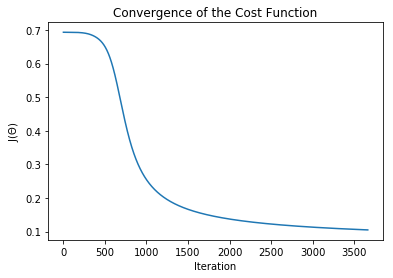

In [65]:
# Use a class for this model, it's good practice and condenses the code
class NNet3:
    # __init__ initializes the instance of the class. SO every time you call this class, you need these inputs. Right?
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = convergence_thres
        self.hidden_layer = int(hidden_layer)
    
    # this is another method in the class (functions inside classes are called methods).
    # you can call this method on a instance of this class to get the result
    # ALSO, a single underscore before a function is meant to denote that the function is meant to be private...
    # ... which I guess means its not really meant to be called. 
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    

    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

<font color=blue> NOTE: In the code above, you have to run model.learn before you can run model.predict, because model.learn sets the theta values... But I guess that makes sense. Because you want to train the model first before you make any predictions... plus if you really wanted to 'predict' with some random theta (or weight) values, you would just use the separate feed forward function. </font>

**Neat! Lets play around with this a little to get a better understanding of whats really happening under the hood here.**

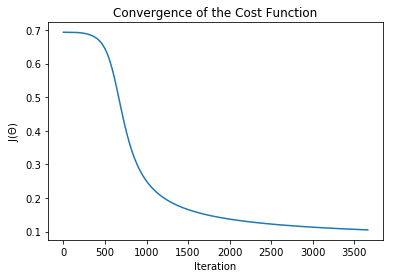

In [148]:
class NNet3_vM:
    # __init__ initializes the instance of the class. SO every time you call this class, you need these inputs. Right?
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer_nodes=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = convergence_thres
        self.hidden_layer_nodes = int(hidden_layer_nodes)
    
    # this is another method in the class (functions inside classes are called methods).
    # you can call this method on a instance of this class to get the result
    # ALSO, a single underscore before a function is meant to denote that the function is meant to be private...
    # ... which I guess means its not really meant to be called. 
    def _multiplecost(self, X, y):
        # feed through network
        layer1, layer2 = self._feedforward(X) 
        # compute error
        costs_sum = y * np.log(layer2) + (1-y) * np.log(1-layer2)
        # negative of average error
        return -np.mean(costs_sum)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        layer1 = sigmoid_activation(X.T, self.weights1).T
        # add a column of ones for bias term
        layer1 = np.column_stack([np.ones(layer1.shape[0]), layer1])
        # activation units are then inputted to the output layer
        layer2 = sigmoid_activation(layer1.T, self.weights2)
        return layer1, layer2
    
    # use the '_', as shown in this function, when assigning variables you don't want to return!
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nrows, ncols = X.shape
        # create FIVE weight1s for each of the HIDDEN LAYERS NODES(there are 4 in the initial case above)
        self.weights1 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer_nodes))
        
        # create 1 weight2s for each of the hidden layer... There are n+1 hidden layer nodes...
        # n is number of hidden layers nodes we specified, add col of 1s to the data so there are 5 weights needed
        self.weights2 = np.random.normal(0,0.01,size=(self.hidden_layer_nodes+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            layer1, layer2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            weight2_slopes = (y-layer2) * layer2 * (1-layer2)
            weight1_slopes = weight2_slopes.T.dot(self.weights2.T) * layer1 * (1-layer1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            
            # for weights2 you have to multiply by layer1 (because, as we learned from datacamp, one of the four...
            # ...components you need to multiply to get the slopes is the value of the node that FEEDS INTO the weight...
            # ...which in this case is layer1 (the hidden layer)).
            # for some reason, we have not done this in the weight2_slopes calc, and do it here instead. Not sure why tbh..
            self.weights2 += layer1.T.dot(weight2_slopes.T) / nrows * self.learning_rate
            
            # just like the adjustment above, we multiple the weight slopes above by the node that FEEDS INTO the...
            # ...weight. In this case, for weights1, the node that feeds into the weight is the input (X).
            # Next we simply take the first column off the matrix (not sure why, figure this out later), divide by the...
            # ...nrows to get the average slope, multiple by the learning rate, and then ADD (not subtract) to the...
            # current weights. Not sure why we add... I think its because its a logistic regression and it switches the...
            # signs around in the calcs... because we take the negative of the mean of slopes in the calc if you recall. 
            self.weights1 += X.T.dot(weight1_slopes)[:,1:] / nrows * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3_vM(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer_nodes=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

# 9. Splitting Data

Now that we have learned about neural networks, learned about backpropagation, and have code which will train a 3-layer neural network, we will split the data into training and test datasets and run the model.

- Choose the first 70 rows in both X and y and assign them respectively to X_train and y_train.
- The last 30 rows should be assigned to variables X_test and y_test.

In [152]:
# First 70 rows to X_train and y_train
# Last 30 rows to X_test and y_test
X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

# 10. Predicting Iris Flowers

To benchmark how well a three layer neural network performs when predicting the species of iris flowers, you will have to compute the AUC, area under the curve, score of the receiver operating characteristic. The function NNet3 not only trains the model but also returns the predictions. The method predict() will return a 2D matrix of probabilities. Since there is only one target variable in this neural network, select the first row of this matrix, which corresponds to the type of flower.

- Train the neural network using X_test and y_test and model, which has been initialized with a set of parameters.
- Once training is complete, use the predict() function to return the probabilities of the flower matching the species Iris-versicolor.
- Compute the AUC score, using roc_auc_score() and assign it to auc.

In [166]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3_vM(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer_nodes=hidden_units)
model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test, yhat)

print(yhat)
auc

[ 0.56976864  0.06258701  0.18635891  0.06753133  0.11770418  0.04062221
  0.99594089  0.02570479  0.9901387   0.91293318  0.05832532  0.06096316
  0.98562578  0.99354224  0.02061874  0.98477151  0.97745225  0.02662189
  0.45665084  0.37092065  0.96077731  0.8284595   0.12998042  0.95434457
  0.90617368  0.04572712  0.05683757  0.01740779  0.98144347  0.06710265]


1.0